## Data information 
Information about the data set (https://www.kaggle.com/olistbr/brazilian-ecommerce) :



- Brazilian E-Commerce Dataset from Olist

- Brazilian e-commerce data set of orders placed in Olist store.

- The data set contains information on 100,000 orders from 2016 to 2018 that were made in several markets in Brazil.

- Its features allow order presentation from multiple dimensions: from order status, price, payment performance, and shipment to customer location, product attributes, and customer reviews at the end.

- We also released a set of geolocation data that links Brazilian zip codes with latitude and longitude coordinates.



- This is real commercial data, its identity has been revealed, and references to companies and partners in the review text have been replaced by the wonderful Game of Thrones house names .


## Analysis Questions
- Where should investors focus on marketing and promotions in terms of areas and marketing?
- What is the percent of the success of the e-commerce inside Brazil ?
- Which payment type should the investors focusing on it ?



In [1]:
#import librares
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

### - Connect with the internal database
 

### - Data Reading
There are many data sets (9 data sets). data sets has joint data that it’s needs to make as a single table. Therefore, to read the data to create a database and use SQL to read files.


In [2]:
def read_from_sql(query,db):
    conn = sql.connect(db)
    df1 = pd.read_sql_query(query,conn)
    
    return df1

In [3]:
db = "db.db" 

query = ''' select olist_customers_dataset.customer_id , olist_customers_dataset.customer_state , olist_orders_dataset.order_id , olist_orders_dataset.order_status , olist_orders_dataset.order_purchase_timestamp , olist_orders_dataset.order_delivered_customer_date
from olist_customers_dataset  
INNER JOIN olist_orders_dataset
on olist_customers_dataset.customer_id = olist_orders_dataset.customer_id ;
 '''

join_1 = read_from_sql(query,db)

In [4]:
join_1.head()

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35
1,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19
2,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51
3,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48


### Data Cleaning :

The data sets contains missing value at a small percentage and it’s needs to clean it in order to visual the data correctly.

In [5]:
join_1.isnull().sum()

customer_id                         0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
dtype: int64

## Exploratory Data Analysis




#### Number of customers

In [6]:
Num_cust = len (join_1.customer_id)
print ("Number of customer = {}".format(Num_cust))

Number of customer = 99441


## Question 1: Where should investors focus on marketing and promotions in terms of areas and marketing?

Number of Olist customers is more than 90,000 customers. The number of customers is formed into several states.

As it becomes clear that more than 40% of customers in (SP) São Paulo and the rest of the customers spread to other states.

As it became clear to us that a large percentage of customers were in São Paulo, therefore investors and entrepreneurs should market and promote products in the least-selling states.

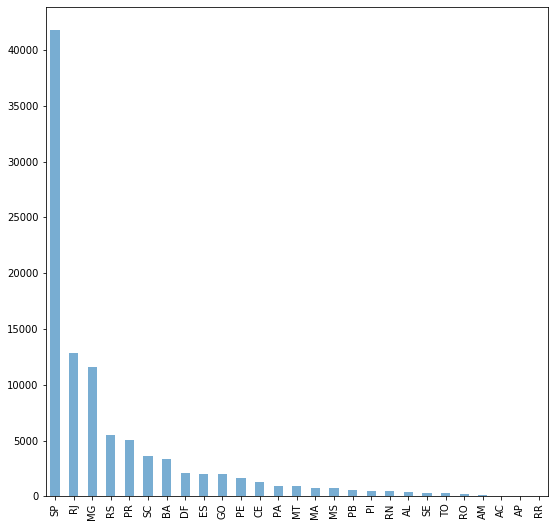

In [7]:
join_1['customer_state'].value_counts().plot(kind='bar',alpha=0.6,figsize=(9,9))
plt.show()

In [8]:
join_1['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

## Question 2: What is the percent of the success of the e-commerce inside Brazil ?
n Brazil, as we mentioned is an emerging market, which is one of the countries that is not very developed, and a great opportunity to enter the latest shopping methods, where the growth rate will be great compared to developing countries.

As it indicates the success of the operating in Olist , we find that more than 97% of the number of shipments were delivered and this is an impressive success to the company with profits

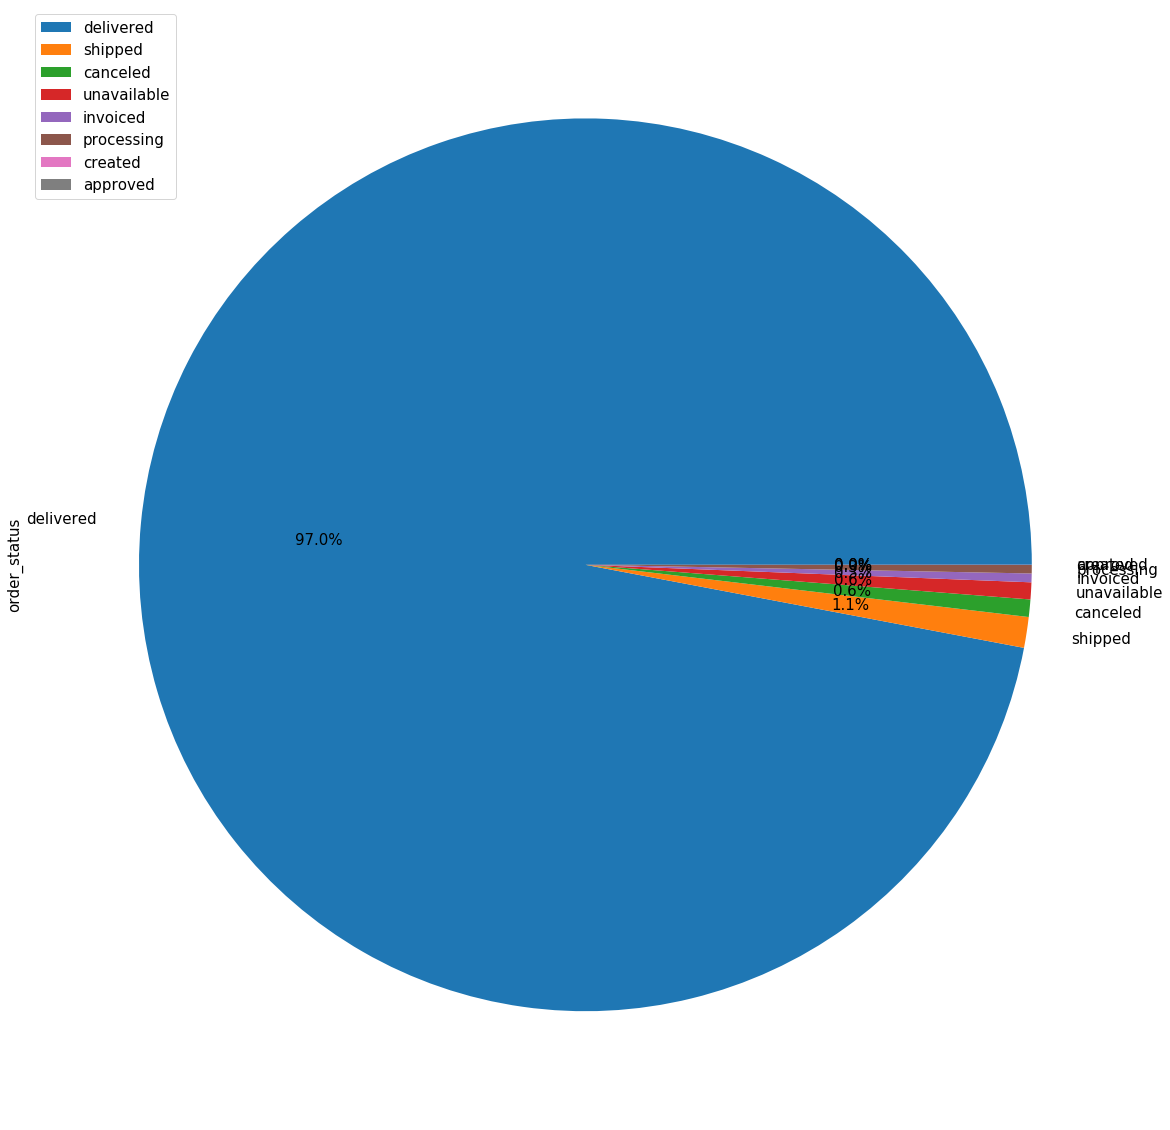

In [61]:
figure(num=None, figsize=(20, 40))
join_1['order_status'].value_counts().plot(kind='pie', autopct='%1.1f%%' )
plt.legend( loc = 'upper left')
plt.rcParams['font.size'] = 15

### Add a column that calculates the time it takes from the start of the order purchase to the delivery to customers

In [10]:
join_1['order_delivered_customer_date'] = pd.to_datetime(join_1['order_delivered_customer_date'])

In [11]:
join_1['order_purchase_timestamp'] = pd.to_datetime(join_1['order_purchase_timestamp'])

In [12]:
join_1["Total_time"] = join_1["order_delivered_customer_date"] - join_1["order_purchase_timestamp"]
join_1.head()

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,Total_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,8 days 19:30:00
1,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,16 days 15:52:55
2,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,26 days 01:51:06
3,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,14 days 23:57:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,11 days 11:04:18


### Calculate the average delivery days

In [14]:
time = join_1['Total_time'].mean()
print ( "Mean of time = {} ".format(time) )

Mean of time = 12 days 13:24:31.879068 


### Second query (completed in the same steps as the first query)

In [18]:
def read_from_sql_2(query_2,db):
    conn = sql.connect(db)
    df2 = pd.read_sql_query(query_2,conn)
    
    return df2

In [19]:
# join two tables (olist_order_items_dataset and olist_sellers_dataset)  
db = "db.db" 

query_2 = '''select distinct olist_order_items_dataset.order_id,olist_order_items_dataset.order_item_id , olist_order_payments_dataset.payment_type, olist_order_payments_dataset.payment_installments, olist_order_payments_dataset.payment_value ,  olist_order_items_dataset.price ,  olist_order_items_dataset.freight_value
from olist_order_payments_dataset
 left JOIN olist_order_items_dataset
on  olist_order_payments_dataset.order_id = olist_order_items_dataset.order_id
 '''

join_2 = read_from_sql_2(query_2,db)

In [20]:
join_2.head()

,order_id,order_item_id,payment_type,payment_installments,payment_value,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8,99.33,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1,24.39,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1,65.71,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8,107.78,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2,128.45,113.57,14.88


In [23]:
#check about null values
join_2.isnull().sum()

order_id                771
order_item_id           771
payment_type              0
payment_installments      0
payment_value             0
price                   771
freight_value           771
dtype: int64

In [24]:
#drop null values
join_2.dropna(subset=['order_id'], inplace=True)

In [26]:
#check about null values
join_2.isnull().sum()

order_id                0
order_item_id           0
payment_type            0
payment_installments    0
payment_value           0
price                   0
freight_value           0
dtype: int64

### Add column (total) to calculate total purchase process (price  +  freight_value) From which we make sure the paid account, Payment_value column equal total column

In [27]:
join_2['total'] = join_2['price'] + join_2['freight_value']
order_items_total = join_2['total'] * join_2['order_item_id']
order_items_total

0          99.33
1          24.39
2          65.71
3         107.78
4         128.45
           ...  
117683    363.31
117684     96.80
117685     47.77
117686    369.54
117687    191.58
Length: 116917, dtype: float64

In [28]:
join_2.head()

,order_id,order_item_id,payment_type,payment_installments,payment_value,price,freight_value,total
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8,99.33,79.80,19.53,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1,24.39,17.00,7.39,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1,65.71,56.99,8.72,65.71
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8,107.78,89.90,17.88,107.78
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2,128.45,113.57,14.88,128.45


### Number of orders

In [29]:
Num_orders = len (join_2.order_id)
print ("Number of orders = {}".format(Num_orders))

Number of orders = 116917


### Calculate the average and sum of total

In [31]:
array = np.asarray(join_2)
array

array([['b81ef226f3fe1789b1e8b2acac839d17', 1.0, 'credit_card', ...,
        79.8, 19.53, 99.33],
       ['a9810da82917af2d9aefd1278f1dcfa0', 1.0, 'credit_card', ...,
        17.0, 7.39, 24.39],
       ['25e8ea4e93396b6fa0d3dd708e76c1bd', 1.0, 'credit_card', ...,
        56.99, 8.72, 65.71000000000001],
       ...,
       ['32609bbb3dd69b3c066a6860554a77bf', 1.0, 'credit_card', ...,
        39.99, 7.78, 47.77],
       ['b8b61059626efa996a60be9bb9320e10', 1.0, 'credit_card', ...,
        349.0, 20.54, 369.54],
       ['28bbae6599b09d39ca406b747b6632b1', 1.0, 'boleto', ..., 169.9,
        21.68, 191.58]], dtype=object)

In [32]:
sum_arr = array[:,7].sum()
mean_arr = array[:,7].mean()
print ("Sum = {}".format(sum_arr))
print ("mean = {}".format(mean_arr))

Sum = 16466531.119998736
mean = 140.8394940000063


## Question 3: Which payment type should the investors focusing on it ?

It is good for investors to focus on diversifying payment methods, as there is not a small percentage of Brazilians that they do not have bank accounts, because of that for a large poverty rate, so it may be good to have payment methods like with Cash .

One of the services it provides Olist is the payment in installments .This shows that Olist has introduced a payment system in installments, due to the high poverty rate in Brazil Many people opt for multiple payments. But still the highest number of people who pay once

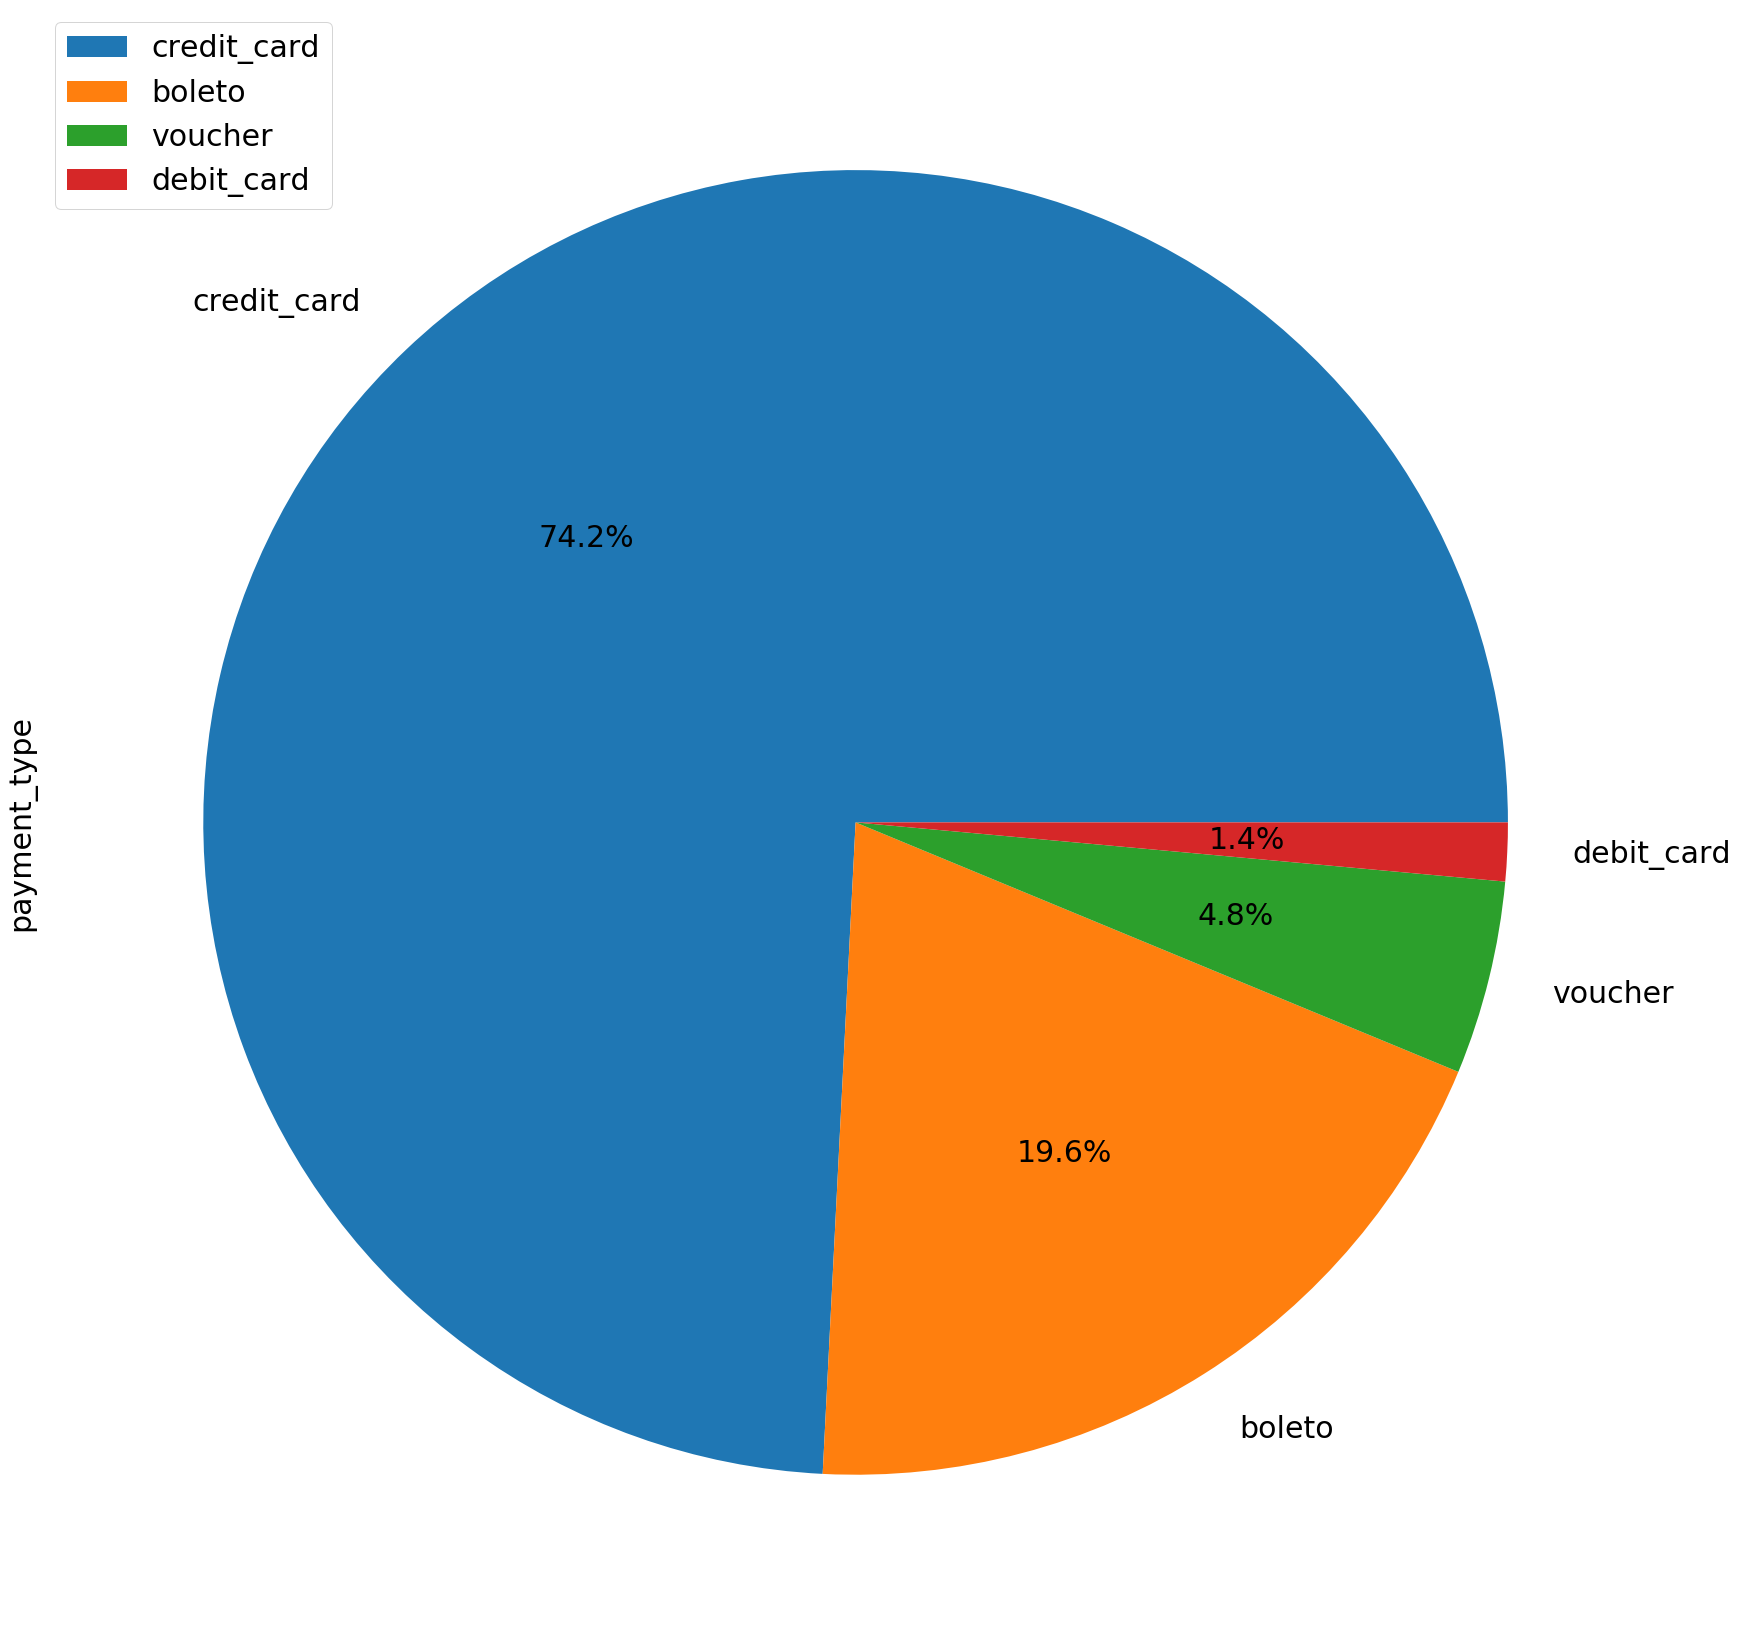

In [41]:
figure(num=None, figsize=(30, 30))
join_2['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%' )
plt.legend( loc = 'upper left')
plt.rcParams['font.size'] = 50

### The number of people who have specified installment payments.This shows that Olist has introduced a payment system in installments, due to the high poverty rate in Brazil Many people opt for multiple payments. But still the highest number of people who pay once

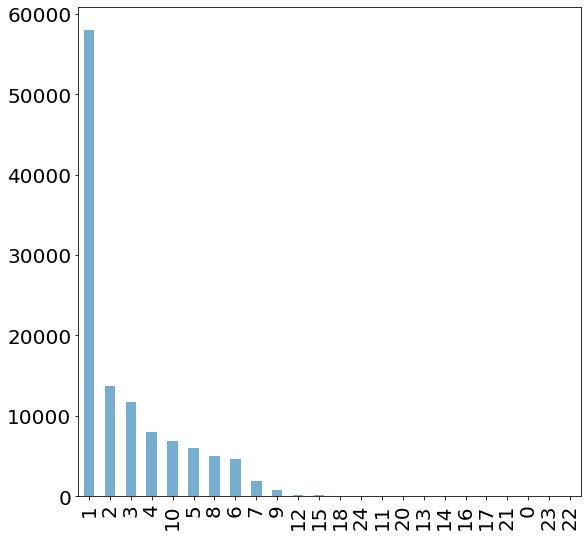

In [46]:
join_2['payment_installments'].value_counts().plot(kind='bar',alpha=0.6,figsize=(9,9))
plt.rcParams['font.size'] = 10
plt.show()